# Assignment 1:
    test if the distribution of ages is the same for 
    
    1) male and femal riders
    
    use 3 tests: KS, Pearson's, Spearman's
### Set significance level = 5%

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
import urllib2
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
url = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
s = json.load(url)
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


/Users/Dexter/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. If you are ambitios you can use data from multiple months, thus addressing systematic errors as well

In [3]:
# df=pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201501-citibike-tripdata.csv')
df=pd.read_csv('201501-citibike-tripdata.csv',parse_dates=['starttime'])
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


#BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [5]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. if i was to do this "for real" the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

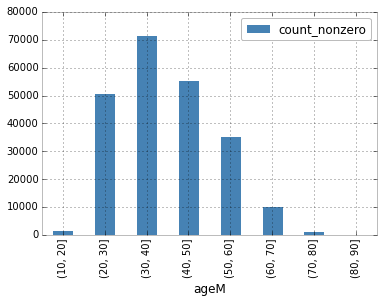

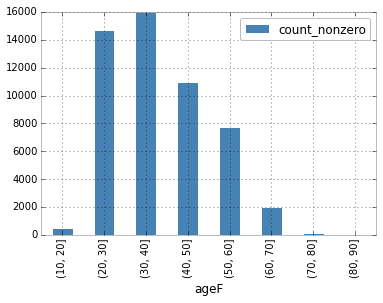

In [6]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


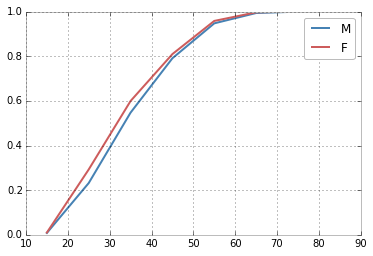

In [28]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

they look pretty darn similar! that sets my expectation for the tests to come. if i wanted to code the KS test by hand i woud have everything i need: the normalized cumulative distributions can be subtracted from each other and the max distance can be seeked. 

Notice that there amay be Nan values you are gonna have to deal with! you can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [7]:
import scipy.stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [8]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

Ks_2sampResult(statistic=0.61519793242561782, pvalue=0.0)


remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

but scipy is already giving you the p-value, so you do not have to worry about it i am still giving you the table FWI and if you want to do the coding of the KS test by hand


In [9]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!

|    $\alpha$    | 0.10 | 0.05 | 0.025 | 0.01 | 0.005 | 0.001 |
|:--------------:|:----:|:----:|:-----:|:----:|:-----:|:-----:|
| $c(\alpha)$    | 1.22 | 1.36 |  1.48 | 1.63 |  1.73 |  1.95 |


### Since the p-value is less than the significance level of 0.05, the null hypothesis is rejected. This means that there is evidence in the data to show the the distribution of ages is different for male and femal riders
***

# Pearson's  test for correlation
 
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [20]:
print 'Size of the ageM = %0.f, Size of the ageF = %0.f'%(df.ageM.dropna().size,df.ageF.dropna().size)
ps=scipy.stats.pearsonr(np.random.choice(df.ageM.dropna(),df.ageF.dropna().size), df.ageF.dropna())
print ps

Size of the ageM = 227764, Size of the ageF = 52093
(-0.0017879138357437452, 0.68322812870827099)


### Note that after cleaning the NaNs in the two samples, their sizes are different which make it impossible to go through the Pearson's test. Here I randomly pick 52093 rows of ageM in order to make its size consistent with ageF. (The error in this process can actually be minimized by Monte Carlo Strategy)

### The Pearson correlation coefficient is very close to 0, which implyies that there is no correlation between the distribution of ages for males and females. Also, the P value is very large, so the correlation coefficient is not statistically significant. Therefore, we can conclude that we do not have enough evidence to say there is no correlation between the distribution of ages for males and females.
***

# Spearman's test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [ ]:
sm = scipy.stats.spearmanr(df.ageM, df.ageF)
print sm

SpearmanrResult(correlation=-0.43552302983795976, pvalue=0.0)


### The Spearman correlation coefficient is -0.435. This implies an negative relationship. Also, the p value is 0 which indicates we can reject the null hypothesis. To sum up, there is enough statistical evidence to conclude that the two samples have a negative correlation.
***

## THE DISTRIBUTION OF RIDERS DURING THE DAY VS DURING THE NIGHT

2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

### Set significance level = 5%  
hint: remember how I converted the starttime last time in my own citibikes notebook into units that are easy to read. 
df['mystarttime'] = ...
then you can use something like
df['mystarttime'].dt.hour

### Divide the data into two groups:
ageD - age of riders in day time (6am - 6pm)  
ageN - age of riders in day time other time of the day

In [21]:
time_night = np.arange(0,6,1).tolist() + np.arange(19,24,1).tolist()
dfd = df.loc[df['starttime'].dt.hour.isin(np.arange(6,19,1))]
dfn = df.loc[df['starttime'].dt.hour.isin(time_night)]
df['ageD'] = 2015-dfd['birth year'][dfd['usertype'] == 'Subscriber']
df['ageN'] = 2015-dfn['birth year'][dfn['usertype'] == 'Subscriber']

### Plot to check the distribution and cdf

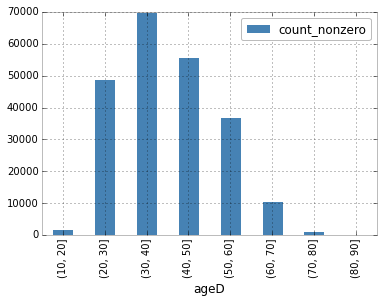

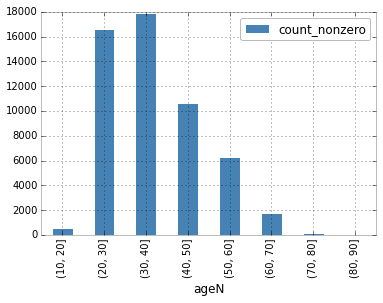

In [22]:
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 20]       0.002374
(20, 30]       0.091860
(30, 40]       0.114181
(40, 50]       0.064402
(50, 60]       0.016694
(60, 70]       0.002409
(70, 80]       0.000041
(80, 90]       0.000000


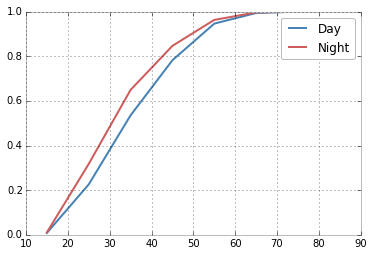

In [23]:
#print df.ageS, df.ageS.cumsum()

csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.legend()

# KS tests to compare 2 samples

In [24]:
ks2=scipy.stats.ks_2samp(df.ageD, df.ageN)
print ks2

Ks_2sampResult(statistic=0.6012565136997815, pvalue=0.0)


### Since the p-value is 0, the null hypothesis is rejected. This means that there is evidence in the data to show the the distribution of ages is different for day and night riders.
***

# Pearson's  test for correlation

In [25]:
print 'Size of the ageD = %0.f, Size of the ageN = %0.f'%(df.ageD.dropna().size,df.ageN.dropna().size)
ps2=scipy.stats.pearsonr(np.random.choice(df.ageD.dropna(),df.ageN.dropna().size), df.ageN.dropna())
print ps2

Size of the ageD = 225807, Size of the ageN = 54117
(0.0019226412138409208, 0.65469075358122408)


### Again, note that after cleaning the NaNs in the two samples, their sizes are different which make it impossible to go through the Pearson's test. Here I choose to pick the first 54117 rows of ageD in order to make its size consistent with ageN. (The error in this process can actually be minimized by Monte Carlo Strategy)

### Similar to the previous case, the Pearson correlation coefficient is very close to 0, which implyies that there is no correlation between the distribution of ages for males and females. Also, the P value is very large, so the correlation coefficient is not statistically significant. Therefore, we can conclude that we do not have enough evidence to say there is no correlation between the distribution of ages for males and females.
***

# Spearman's  test for correlation

In [26]:
sm2 = scipy.stats.spearmanr(df.ageD, df.ageN)
print sm2

SpearmanrResult(correlation=-0.44710427224649135, pvalue=0.0)


### The Spearman correlation coefficient is -0.447. This implies an negative relationship. Also, the p value is 0 which indicates we can reject the null hypothesis. To sum up, there is enough statistical evidence to conclude that the two samples have a negative correlation.
***